In [77]:
# Final Project Code

In [78]:
# A non-python command to make sure all figures are plotted on this page.
%matplotlib inline

In [79]:
# Import the necessary python packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import seaborn as sns
import cartopy.feature as cfeature 
from scipy import stats
from load_gridded_data import read_gridded_data_NOAA20CR
import xarray as xr

In [80]:
# Load the proxy data and metadata using the pandas library.
proxies = pd.read_pickle('../LMR_data/data/proxies/Pages2kv1_Proxies.df.pckl')
metadata = pd.read_pickle('../LMR_data/data/proxies/Pages2kv1_Metadata.df.pckl')

In [81]:
# The "type" and "shape" commands can be used to learn more about the data set.
# The proxy data:
print(type(proxies))
print(proxies.shape)

<class 'pandas.core.frame.DataFrame'>
(2512, 577)


In [82]:
# Let's look at the contents of the proxy file.
print(proxies)

          Ant_01     Ant_02 Ant_03 Ant_04 Ant_05 Ant_06 Ant_07 Ant_08 Ant_09  \
Year C.E.                                                                      
-500         NaN        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-499         NaN        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-498         NaN        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-497         NaN        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-496         NaN        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...          ...        ...    ...    ...    ...    ...    ...    ...    ...   
 2007        NaN -21.668108    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 2008        NaN        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 2009        NaN        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 2010        NaN        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 2011        NaN        NaN    NaN    Na

In [83]:
# The "keys" command shows all of the keys for this dataset.
print(proxies.keys())

Index(['Ant_01', 'Ant_02', 'Ant_03', 'Ant_04', 'Ant_05', 'Ant_06', 'Ant_07',
       'Ant_08', 'Ant_09', 'Ant_10',
       ...
       'SAm_14', 'SAm_15', 'SAm_16', 'SAm_17', 'SAm_18', 'SAm_19', 'SAm_20',
       'SAm_21', 'SAm_22', 'SAm_23'],
      dtype='object', length=577)


In [84]:
# Display all of the fields in the metadata file.
print(metadata.keys())

Index(['PAGES 2k Region', 'Proxy ID', 'Country/Region', 'Area', 'Site',
       'Lat (N)', 'Lon (E)', 'Archive type', 'Proxy measurement',
       'Proxy other info', 'Sign relation to temp', 'Oldest (C.E.)',
       'Youngest (C.E.)', 'Resolution (yr)', 'Reference'],
      dtype='object')


In [85]:
# We can write some code to search the metadata for a proxy we're interested in. 

# Tells how many records are from Asia.
search_string = 'South America'
field_to_search = 'PAGES 2k Region'

'''
search_string1 = 'Ice core'
field_to_search1 = 'Archive type'
'''
search_string1 = 'Tree ring'
field_to_search1 = 'Archive type'


field_to_search2 = 'Sign relation to temp'
'''
search_string2 = 'Negative'
field_to_search2 = 'Sign relation to temp'
'''




# Loop through every key.  If part of the key matches the the search string, print the index and the key.
n_proxies = metadata.shape[0]
#print(n_proxies)
# The percent and number represents the spacing between categories.
print('%5s: %20s: %20s: %20s:' % ('index','Site','Country/Region','Archive type'))
South_America_index = []
count = 0
proxies = proxies.truncate(before=1950, after=1990, axis="index") # make later time period
for i in range(n_proxies):
    if isinstance(metadata.loc[i][field_to_search], str):
        if search_string.lower() in metadata.loc[i][field_to_search].lower() and search_string1.lower() in metadata.loc[i][field_to_search1].lower():
            print('%5s: %20s, %20s, %20s' % (i, metadata.loc[i]['Site'], metadata.loc[i]['Country/Region'],\
                                            metadata.loc[i]['Archive type']))
            count = count+1
            South_America_index = np.append(South_America_index, i)
print(South_America_index)
South_America_index = South_America_index.astype(int)
                  
                  
print(count)
print(South_America_index.shape)
print(proxies.shape)
print(proxies.index)



'''
# regular composite using 2 of the ice core proxy samples from south america.
# Loop through every key.  If part of the key matches the the search string, print the index and the key.
n_proxies = metadata.shape[0]
#print(n_proxies)
# The percent and number represents the spacing between categories.
print('%5s: %20s: %20s: %20s:' % ('index','Site','Country/Region','Archive type'))
South_America_index = []
count = 0
proxies = proxies.truncate(before=1950, after=1990, axis="index")
for i in range(n_proxies):
    if isinstance(metadata.loc[i][field_to_search], str):
        if search_string.lower() in metadata.loc[i][field_to_search].lower() and search_string1.lower() in metadata.loc[i][field_to_search1].lower():
            print('%5s: %20s, %20s, %20s' % (i, metadata.loc[i]['Site'], metadata.loc[i]['Country/Region'],\
                                              metadata.loc[i]['Archive type']))
            count = count+1
            South_America_index = np.append(South_America_index, i)
            #South_America_index = np.abs(np.append(South_America_index, i))
print(South_America_index)
South_America_index = South_America_index.astype(int)
print(count)
print(South_America_index.shape)
print(proxies.shape)
print(proxies.index)
'''

index:                 Site:       Country/Region:         Archive type:
  503:      CAN composite 6,                Chile,            Tree ring
  504:     CAN composite 11,                Chile,            Tree ring
  505:          Santa Lucia,                Chile,            Tree ring
  506:      CAN composite 9,            Argentina,            Tree ring
  507:     CAN composite 24,            Argentina,            Tree ring
  508:      CAN composite 4,            Argentina,            Tree ring
  509:      CAN composite 2,            Argentina,            Tree ring
  510:     CAN composite 31,            Argentina,            Tree ring
  511:        Glaciar Frias,                Chile,            Tree ring
  512:      NWA composite 2,            Argentina,            Tree ring
  513:      SAN composite 2,                Chile,            Tree ring
  514:     CAN composite 16,            Argentina,            Tree ring
  515:     CAN composite 19,                Chile,            T

'\n# regular composite using 2 of the ice core proxy samples from south america.\n# Loop through every key.  If part of the key matches the the search string, print the index and the key.\nn_proxies = metadata.shape[0]\n#print(n_proxies)\n# The percent and number represents the spacing between categories.\nprint(\'%5s: %20s: %20s: %20s:\' % (\'index\',\'Site\',\'Country/Region\',\'Archive type\'))\nSouth_America_index = []\ncount = 0\nproxies = proxies.truncate(before=1950, after=1990, axis="index")\nfor i in range(n_proxies):\n    if isinstance(metadata.loc[i][field_to_search], str):\n        if search_string.lower() in metadata.loc[i][field_to_search].lower() and search_string1.lower() in metadata.loc[i][field_to_search1].lower():\n            print(\'%5s: %20s, %20s, %20s\' % (i, metadata.loc[i][\'Site\'], metadata.loc[i][\'Country/Region\'],                                              metadata.loc[i][\'Archive type\']))\n            count = count+1\n            South_America_index

In [86]:

# Ice cores
index_selected = South_America_index


In [87]:
'''
## Define separate composite of south america using only 2 tree ring proxy samples.
South_America_list = South_America_index[4]
South_America_list = np.append(South_America_list,South_America_index[7])
print(South_America_index)
print(South_America_list)
# Tree rings composite
index_selected = South_America_list.astype(int)
'''
metadata_sub = metadata.iloc[index_selected]  # select a cross section of dataframe using a label



In [88]:
# Loop through every element of the metadata and print it to screen.
for key in metadata.keys():
    print('%27s : %20s' % (key, metadata.loc[index_selected][key]))

            PAGES 2k Region : 503    South America
504    South America
505    South America
506    South America
507    South America
508    South America
509    South America
510    South America
511    South America
512    South America
513    South America
514    South America
515    South America
516    South America
517    South America
Name: PAGES 2k Region, dtype: object
                   Proxy ID : 503    SAm_05
504    SAm_06
505    SAm_07
506    SAm_08
507    SAm_09
508    SAm_10
509    SAm_11
510    SAm_12
511    SAm_13
512    SAm_14
513    SAm_15
514    SAm_16
515    SAm_17
516    SAm_18
517    SAm_19
Name: Proxy ID, dtype: object
             Country/Region : 503        Chile
504        Chile
505        Chile
506    Argentina
507    Argentina
508    Argentina
509    Argentina
510    Argentina
511        Chile
512    Argentina
513        Chile
514    Argentina
515        Chile
516    Argentina
517        Chile
Name: Country/Region, dtype: object
                       Area

In [89]:
# Get the key of the desired record.
proxyID_selected = metadata.loc[index_selected]['Proxy ID']
#print(proxyID_selected)
# Get the data for this record.
proxy_data = proxies[proxyID_selected]
print(proxyID_selected)
print(proxy_data)

print("")

for i in range(len(index_selected)):
    index = index_selected[i]
    if metadata.loc[index][field_to_search2] == 'Negative':
        proxy_data[proxyID_selected[index]] = proxies[proxyID_selected[index]]*-1
    elif metadata.loc[index][field_to_search2] == 'Positive':
        proxy_data[proxyID_selected[index]] = proxies[proxyID_selected[index]]*1
           
print(proxy_data)
#print(proxy_data.shape)
proxy_data_variance = np.var(proxy_data)
print(proxy_data_variance)
# Standardize the data by subtracting the proxy data from the mean as per instructed and then divide by the standard deviation.
proxy_data_standardize = (proxy_data-proxy_data.mean())/proxy_data.std()
print(proxy_data_standardize.shape)
proxy_data_composite = proxy_data_standardize.mean(axis=1)
print(proxy_data_composite.shape)

503    SAm_05
504    SAm_06
505    SAm_07
506    SAm_08
507    SAm_09
508    SAm_10
509    SAm_11
510    SAm_12
511    SAm_13
512    SAm_14
513    SAm_15
514    SAm_16
515    SAm_17
516    SAm_18
517    SAm_19
Name: Proxy ID, dtype: object
          SAm_05 SAm_06    SAm_07 SAm_08 SAm_09    SAm_10 SAm_11 SAm_12  \
Year C.E.                                                                 
1950       1.316  1.453 -0.143609  3.392  1.017  -0.90448  1.296  0.563   
1951      -0.371  1.316 -0.594351  0.437   1.13  0.181383  1.732 -1.282   
1952       0.461  1.161 -0.587139  0.671  1.262 -1.076557   0.03 -0.869   
1953       0.873  1.128 -0.561898  1.411  1.155  0.110179  0.654 -0.502   
1954       0.191  0.919 -0.605169  0.703  1.104 -0.625597  0.908 -1.254   
1955        1.19  1.215 -1.091971  1.491  1.201 -0.139035 -0.103  -0.44   
1956       -0.06  0.926 -0.143609  0.522  0.898  0.329725   0.17 -0.959   
1957       -0.61  0.653 -1.748251  0.517  0.637 -1.847935 -0.382 -1.159   
1958      

/var/folders/yq/tqpd2dgs0zd40t9k3_t403n80000gn/T/ipykernel_9641/3646389889.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proxy_data[proxyID_selected[index]] = proxies[proxyID_selected[index]]*1
/var/folders/yq/tqpd2dgs0zd40t9k3_t403n80000gn/T/ipykernel_9641/3646389889.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proxy_data[proxyID_selected[index]] = proxies[proxyID_selected[index]]*-1


In [90]:

# Read in Observational Temp.
# data path
datadir_calib = '/Users/hanna/Documents/Documents - Hanna’s MacBook Air/PaleoClimate/LMR/notebooks/'

# load temperature data
calib_vars = ['Tsfc']

# load NOAA 20th century data
data_calib = 'airtemp.sfc.mon.mean_noaa20cr.nc'
[ctime, obs_lat, obs_lon, obs_temp] = read_gridded_data_NOAA20CR(datadir_calib, data_calib, calib_vars, outfreq='annual')

# convert to anomaly
obs_anomaly = obs_temp - np.mean(obs_temp, axis=0)
obs_time = np.array([d.year for d in ctime])



min_lat = -55.
max_lat = -11.
min_lon = -81.
max_lon = -33.

# Define calibration period

start_yr = 1950
end_yr = 1990

min_lat_ix = np.argmin(abs(obs_lat - min_lat))
max_lat_ix = np.argmin(abs(obs_lat - max_lat))

min_lon_ix = np.argmin(abs(obs_lon - min_lon))
max_lon_ix = np.argmin(abs(obs_lon - max_lon))

min_tim_ix = np.argmin(abs(obs_time - start_yr))
max_tim_ix = np.argmin(abs(obs_time - end_yr))

obs_lat = obs_lat[max_lat_ix:min_lat_ix+1]
obs_lon = obs_lat[min_lon_ix:max_lon_ix+1]
obs_anomaly_select = obs_anomaly[:,max_lat_ix:min_lat_ix+1, min_lon_ix:max_lon_ix+1] # add 1 to the max lat to make it inclusive
wts = np.cos(np.deg2rad(obs_lat))
obs_anom_avg = np.average(np.average(obs_anomaly_select,axis=1,weights=wts),axis=1) # avg over lat (with weights) and lon


obs_time = obs_time[min_tim_ix:max_tim_ix+1]
obs_anom_average = obs_anom_avg[min_tim_ix:max_tim_ix+1]
#print(obs_anom_avg)
#print(obs_anom_average)

In [91]:

comp = proxy_data_composite.truncate(before=start_yr, after=end_yr, axis="index")
comp = (comp-comp.mean())/comp.std()
center = np.mean(obs_anom_average)
comp_center = comp + center
slope, intercept, r_value, p_value, std_err = stats.linregress(obs_anom_average, comp_center)
scale = slope
comp_scale = comp_center/scale
comp_scale = comp_center
# check to make sure shapes match
print(obs_anom_average.shape)
print(comp_center.shape)
print(r_value)

# Tree rings all have -0.04285
# Ice cores move to 0.166
# 2 tree rings have -0.110

(41,)
(41,)
0.22582978076336604


In [92]:
# Save some useful metadata to new variables.
reference    = metadata.loc[index_selected]['Reference']
site_name    = metadata.loc[index_selected]['Site']
lat          = metadata.loc[index_selected]['Lat (N)']
lon          = metadata.loc[index_selected]['Lon (E)']
archive_type = metadata.loc[index_selected]['Archive type']
measurement  = metadata.loc[index_selected]['Proxy measurement']

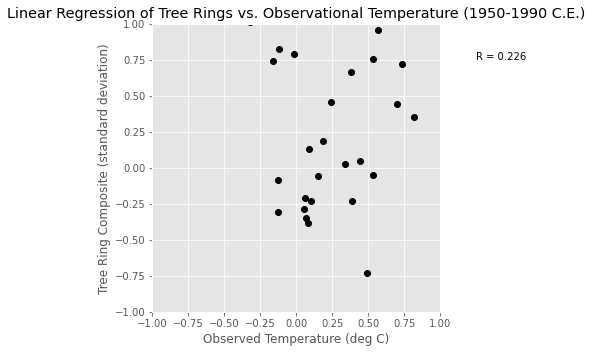

In [93]:
# Linear regression for the observational and proxy type (pick tree rings or ice cores)
# which r-value is better
plt.style.use('ggplot')
plt.figure(figsize=(5,5))
ax = plt.axes([.1,.1,.8,.8])
plt.plot(obs_anom_average, comp_scale, color='k', marker='o', linewidth=0)
plt.text(1.25, 0.75, 'R = %0.3f' % r_value)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title('Linear Regression of Tree Rings vs. Observational Temperature (1950-1990 C.E.)')
#plt.title('Linear Regression of Ice Cores vs. Observational Temperature (1950-1990 C.E.)')
plt.xlabel("Observed Temperature (deg C)")
plt.ylabel("Tree Ring Composite (standard deviation)")
#plt.ylabel("Ice Core Composite (standard deviation)")
plt.show()

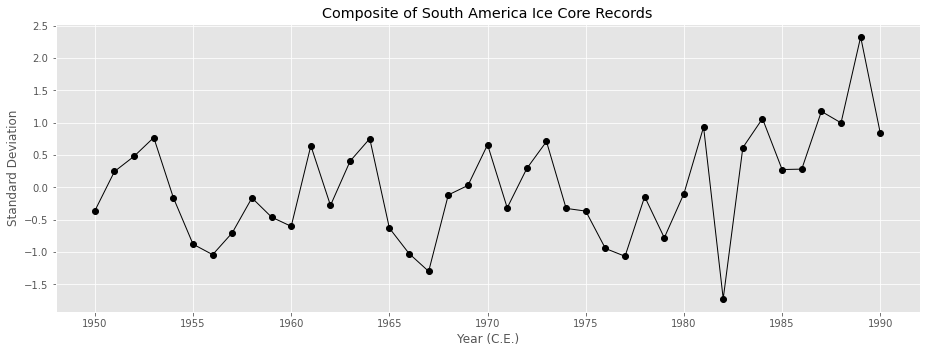

In [56]:

# Make a figure of the proxy record.
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
ax = plt.axes([.1,.1,.8,.8])
plt.plot(proxy_data_composite,color='k',marker='o',linewidth=1)
plt.title('Composite of South America Ice Core Records')
#plt.title('Composite of South America 2 Randomly Selected Tree Ring Records')
#plt.title('Composite of South America of all the Tree Ring Records')
plt.xlabel("Year (C.E.)")
plt.ylabel("Standard Deviation")
plt.show()


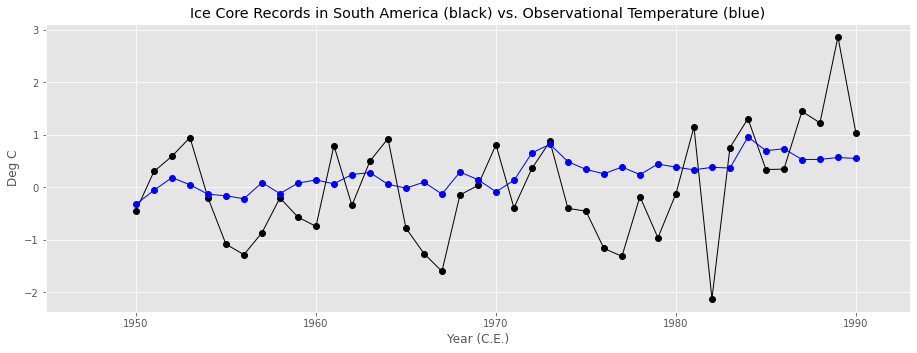

In [57]:

# Figure for proxy composite and observational temperature
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
ax = plt.axes([.1,.1,.8,.8])
plt.plot(comp, color='k', marker='o', linewidth=1)
plt.plot(obs_time,obs_anom_average, color='b', marker='o', linewidth=1)
plt.xlabel('Year (C.E.)')
plt.xlim(1945,1993)
plt.ylabel('Deg C')
#plt.title('Tree Ring Records in South America (black) vs. Observational Temperature (blue)')
plt.title('Ice Core Records in South America (black) vs. Observational Temperature (blue)')
plt.show()


In [20]:
# Further exploration
# Figure 1


In [21]:
class PAGES2k(object):
    archive_types = ['Bivalve',
                    'Borehole',
                    'Coral',
                    'Documentary',
                    'Ice core',
                    'Hybrid',
                    'Lake/wetland sediments',
                    'Lake sediment',
                    'Marine sediments',
                    'Marine sediment',
                    'Sclerosponge',
                    'Speleothem',
                    'Tree ring',
                    'Historic',
                    'Instrumental',
                    'Hyrax midden']
    markers = ['p', 'p', 'o', 'v', 'd', '*', 's', 's', '8','8', 'D', '^','h','1','2','3']
    markers_dict = dict(zip(archive_types, markers))
    colors = [np.array([ 1.        ,  0.83984375,  0.        ]),
              np.array([ 0.73828125,  0.71484375,  0.41796875]),
              np.array([ 1.        ,  0.546875  ,  0.        ]),
              np.array([ 0.41015625,  0.41015625,  0.41015625]),
              np.array([ 0.52734375,  0.8046875 ,  0.97916667]),
              np.array([ 0.        ,  0.74609375,  1.        ]),
              np.array([ 0.25390625,  0.41015625,  0.87890625]),
              np.array([ 0.25390625,  0.41015625,  0.87890625]),
              np.array([ 0.54296875,  0.26953125,  0.07421875]),
              np.array([ 0.54296875,  0.26953125,  0.07421875]),
              np.array([ 1         ,           0,           0]),
              np.array([ 1.        ,  0.078125  ,  0.57421875]),
              np.array([ 0.1953125 ,  0.80078125,  0.1953125 ]),
              np.array([ 0.1953125 ,  0.80078125,  0.8 ]),
              np.array([ 0.2 ,  0.2,  0.8 ]),
              np.array([ 0.8 ,  0.80078125,  0.8 ])]
    colors_dict = dict(zip(archive_types, colors))

In [22]:
def plot_sites(df, title=None, lon_col='Lon (E)', lat_col='Lat (N)', archiveType_col='Archive type',
               title_size=20, title_weight='bold', figsize=[10, 8], projection=ccrs.Robinson(), markersize=50,
               plot_legend=True, legend_ncol=3, legend_anchor=(0, -0.4), legend_fontsize=15, frameon=False, ax=None):
               
    
    ''' Plot the location of the sites on a map

    Args:
        df (Pandas DataFrame): the Pandas DataFrame

    Returns:
        ax (Axes): the map plot of the sites
    '''
    p = PAGES2k()
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = plt.subplot(projection=projection)

    sns.set(style="ticks", font_scale=2)

    # plot map
    if title:
        plt.title(title, fontsize=title_size, fontweight=title_weight)
        plt.title('PAGES 2k South America Tree Ring Records (n=2 (out of the total 15 samples))', fontsize=title_size, fontweight=title_weight)
        #plt.title('PAGES 2k South America Ice Core Records (n=2)', fontsize=title_size, fontweight=title_weight)
    
    ax.set_global()
    ax.add_feature(cfeature.LAND, facecolor='gray', alpha=0.3)
 
    # plot markers by archive types
    s_plots = []
    type_names = []
    df_archiveType_set = np.unique(df[archiveType_col])
    for type_name in df_archiveType_set:
        selector = df['Archive type'] == 'Tree ring'
        type_names.append(f'{type_name} (n={len(df[selector])})')
        s_plots.append(
            ax.scatter(
                df[selector][lon_col], df[selector][lat_col], marker=p.markers_dict[type_name],
                c=p.colors_dict[type_name], edgecolor='k', s=markersize, transform=ccrs.PlateCarree()
            )
        )
        


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


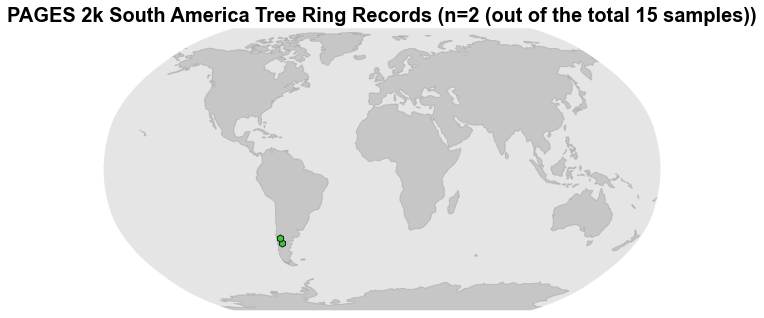

In [23]:
# Plot map of proxy data
ax = plot_sites(metadata_sub, title=f'PAGES2k Network (n={len(metadata_sub)})')